In [19]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [20]:
from landmarks import FaceLandmarks

In [21]:
from emotion_model import LandmarkEmotionModel

In [22]:
dataset_path = '../data/face_landmarks.csv'
df = pd.read_csv(dataset_path, header=None)
y = df[df.columns[0]]               # Values of the first column (Labels)

x = df.drop(df.columns[0], axis=1)  # Rest of the columns are the features


In [23]:
print(x.shape)

(17335, 956)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
random_seed = 42

In [26]:
x = x.values
y = y.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=random_seed)

In [27]:
y_train

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [28]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape to (batch_size, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)


In [29]:
y_train

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])

# Training the model

In [30]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

Using device: cuda


In [31]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [32]:
model = LandmarkEmotionModel().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [33]:
epochs = 400
losses = []

In [34]:
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0 or i == epochs - 1:
        print(f"Epoch {i}/{epochs} - Loss: {loss.item()}")


Epoch 0/400 - Loss: 1.8942937850952148
Epoch 10/400 - Loss: 0.5895615220069885
Epoch 20/400 - Loss: 0.6220122575759888
Epoch 30/400 - Loss: 0.5746421813964844
Epoch 40/400 - Loss: 0.5673725605010986
Epoch 50/400 - Loss: 0.5658833384513855
Epoch 60/400 - Loss: 0.5642817616462708
Epoch 70/400 - Loss: 0.5630678534507751
Epoch 80/400 - Loss: 0.5621428489685059
Epoch 90/400 - Loss: 0.5611884593963623
Epoch 100/400 - Loss: 0.560219407081604
Epoch 110/400 - Loss: 0.5592306852340698
Epoch 120/400 - Loss: 0.5582187175750732
Epoch 130/400 - Loss: 0.5572057366371155
Epoch 140/400 - Loss: 0.5561692118644714
Epoch 150/400 - Loss: 0.5550966262817383
Epoch 160/400 - Loss: 0.5539724826812744
Epoch 170/400 - Loss: 0.55283522605896
Epoch 180/400 - Loss: 0.5516690611839294
Epoch 190/400 - Loss: 0.550462543964386
Epoch 200/400 - Loss: 0.5491816997528076
Epoch 210/400 - Loss: 0.5478287935256958
Epoch 220/400 - Loss: 0.5463778972625732
Epoch 230/400 - Loss: 0.5447927117347717
Epoch 240/400 - Loss: 0.5431833

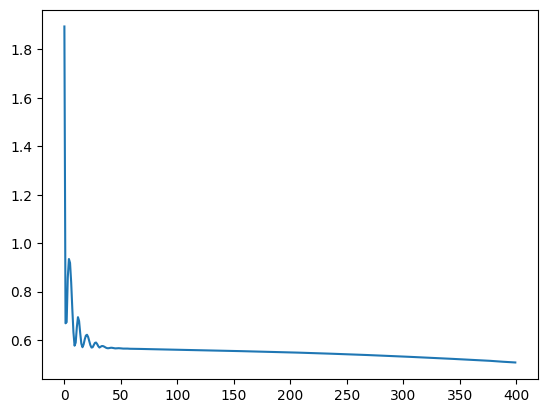

In [35]:
plt.plot(range(epochs), losses)

# Save the model

In [36]:
if 1 == 1:
    path = './models/landmark_emotion_model.pt'
    torch.save(model.state_dict(), path)